<a href="https://colab.research.google.com/github/Shruti-codes/SHALA2020/blob/master/ML_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, roc_curve, classification_report

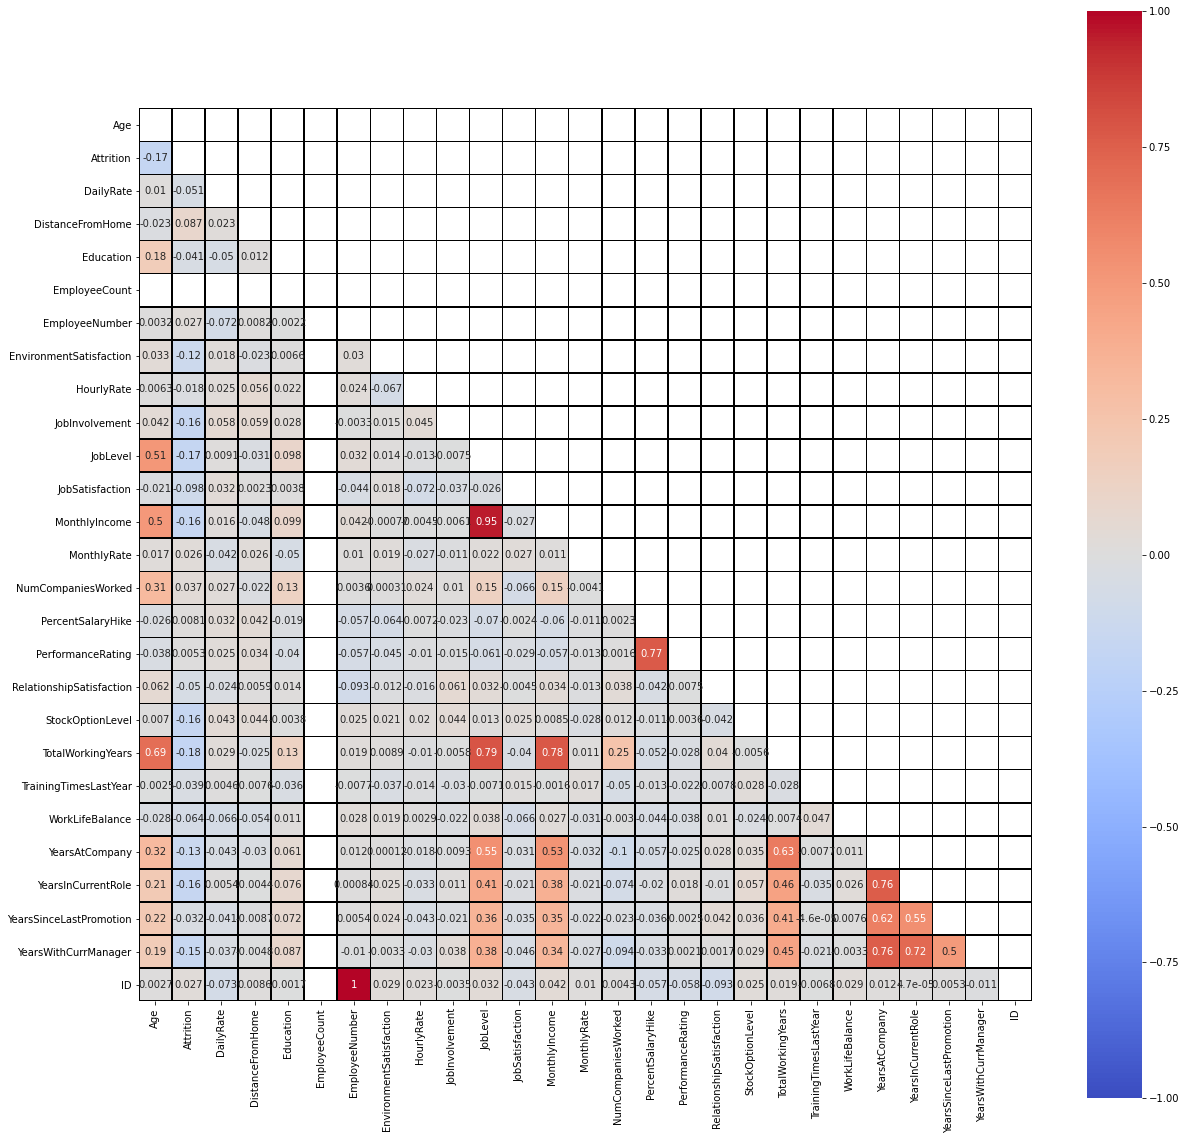

In [32]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(attrition_data.corr(), annot=True, square= True, mask = mask, cmap = "coolwarm", linewidths=0.5, linecolor = "black", cbar= True, vmin = -1, vmax=1, center = 0)
plt.show()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedf4fbbdd8>


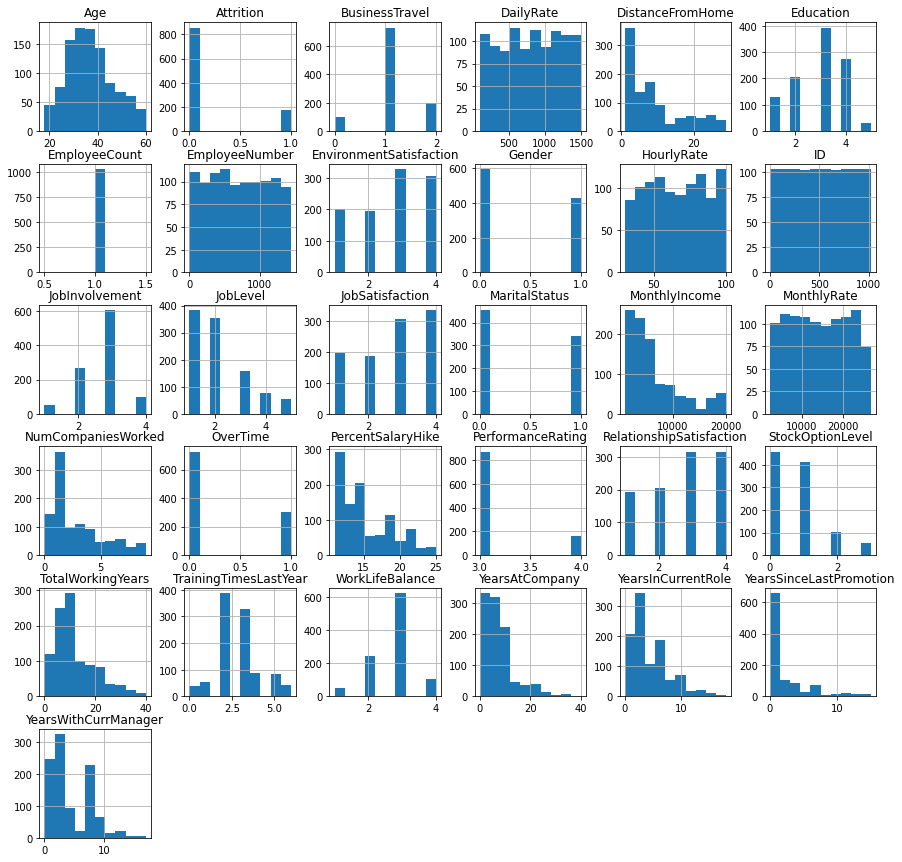

In [52]:
attrition_data.hist(figsize = (15,15))

In [33]:
attrition_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,0,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0,1023
1024,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6,1024
1025,24,0,Travel_Rarely,1476,Sales,4,1,Medical,1,1445,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3,1025
1026,32,0,Travel_Rarely,601,Sales,7,5,Marketing,1,1446,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3,1026


In [0]:
attrition_data['MaritalStatus'] = attrition_data['MaritalStatus'].fillna('Unknown')

mapping_travel = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
attrition_data['BusinessTravel'] = attrition_data['BusinessTravel'].map(mapping_travel)

mapping_gender = {'Female':1, 'Male':0}
attrition_data['Gender'] = attrition_data['Gender'].map(mapping_gender)

mapping_marital = {'Married':0, 'Single':1, 'Unknown':2}
attrition_data['MaritalStatus'] = attrition_data['MaritalStatus'].map(mapping_marital)

mapping_overtime = {'No':0, 'Yes':1}
attrition_data['OverTime'] = attrition_data['OverTime'].map(mapping_overtime)

#attrition_data['MaritalStatus'].isna().sum()

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [50]:
#features
X = attrition_data.drop(["Attrition", "Department", "EducationField", "JobRole", "ID", "MaritalStatus","EmployeeCount", "EmployeeNumber","MonthlyRate", "HourlyRate", "PercentSalaryHike"], axis = 1)
y = attrition_data['Attrition']     #labels
X.isna().sum()


Age                         0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


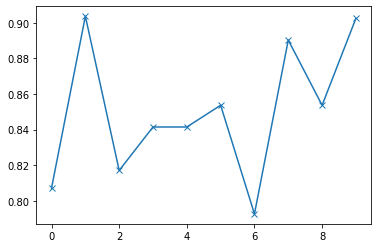

Accuracy (after Cross validation) = 85.04%
Mean Absolute error (Training) = 0.0
Mean Absolute error (Testing) = 0.1407766990291262
Accuracy (Training) = 100.0%
Accuracy (Testing) = 86.0%
Confusion Matrix 
[[170   2]
 [ 27   7]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       172
           1       0.78      0.21      0.33        34

    accuracy                           0.86       206
   macro avg       0.82      0.60      0.62       206
weighted avg       0.85      0.86      0.82       206



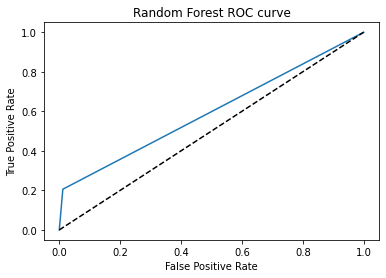

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=123)

#Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)

#Cross-Validation
kfold = KFold(n_splits=10, random_state=123)
res = cross_val_score(rfc, X_train, y_train, cv=kfold)
plt.plot(np.arange(10), res ,'x-', linewidth = 1.5)
plt.show()
print("Accuracy (after Cross validation) = %.2f%%" % (res.mean()*100))

#Performance Metrics
print("Mean Absolute error (Training) = {}".format(mean_absolute_error(y_train, train_pred)))
print("Mean Absolute error (Testing) = {}".format(mean_absolute_error(y_test, test_pred)))
print("Accuracy (Training) = {}%".format(np.round(accuracy_score(y_train, train_pred)*100),2))
print("Accuracy (Testing) = {}%".format(np.round(accuracy_score(y_test, test_pred)*100),2))
print("Confusion Matrix ")
print(confusion_matrix(y_test, test_pred))
print("Classification Report")
print(classification_report(y_test, test_pred))
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, test_pred)
plt.plot(fper,tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  